In [1]:
%pylab inline
import pandas as pd
from IPython.core.display import Image 

Populating the interactive namespace from numpy and matplotlib


In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#describe function will give us count, mean, standard deviation (std), min, quartiles and max in its output 
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Here are a few inferences, you can draw by looking at the output of describe() function:


* Loan Amount is missing 22 values (614-592)
* Loan_Amount_Term is missing 14 values (614-600)
* Credit_History is missing 50 values(614-564)
* 84% applicants have a credit_history.The mean of Credit_History field is 0.82(Credit_History has value 1 for those who have a credit history and 0 otherwise)
* The ApplicantIncome and CoapplicantIncome distribution seems to be in line with expectation. 





In [5]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

###### Histogram of the applicant Income 

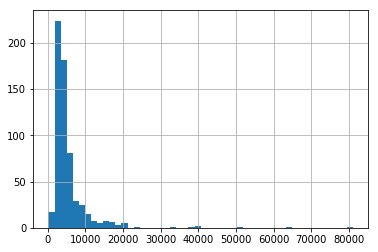

In [6]:
data['ApplicantIncome'].hist(bins=50)

## Explaination for understanding boxplot

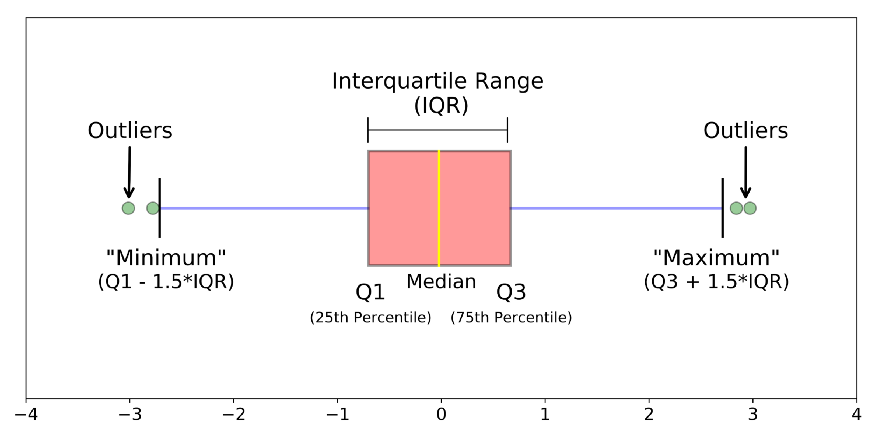

In [7]:
Image(filename=('explaination.png')) 

###### Now we will make box plots to understand the distributions of various incomes of applicant.

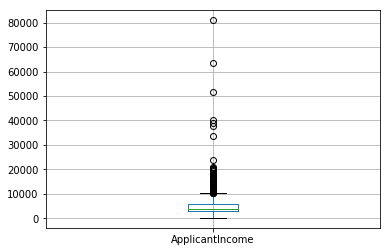

In [8]:
data.boxplot(column='ApplicantIncome')

###### Now we will make box plots to understand the distributions of various incomes of applicant on basis of there education.

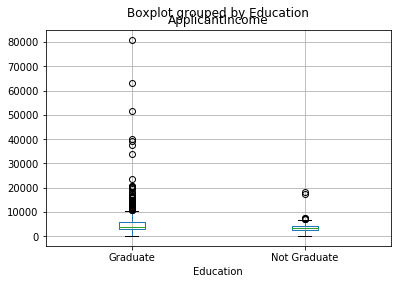

In [9]:
data.boxplot(column='ApplicantIncome',by='Education')

We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

###### Histogram and boxplot of the Loan Amount 

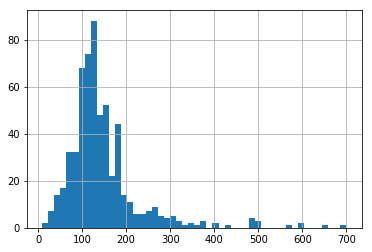

In [10]:
data['LoanAmount'].hist(bins=50)

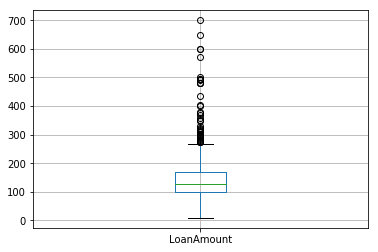

In [11]:
data.boxplot(column='LoanAmount')

there are some extreme values. Clearly, both ApplicantIncome and LoanAmount require some amount of data cleaning.The technical word for data cleaning in data science is <b>Data Munging</b>

#### We will now look at the chances of getting a loan based on credit history

In [12]:
temp1 = data['Credit_History'].value_counts(ascending=True)

temp2 = data.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

In [13]:
print ('Frequency Table for Credit History:') 
print (temp1)


Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64


In [14]:
print ('\nProbility of getting loan for each Credit History class:')
print (temp2)


Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


#### Now we will plot this data   

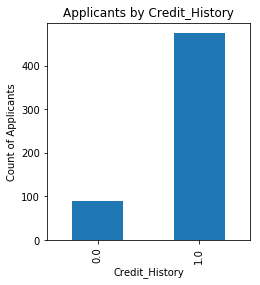

In [15]:
fig = figure(figsize=(8,4))
ax1 = fig.add_subplot(122)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')


C:\Users\Vishwam\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, 'Probability of getting loan by credit history')

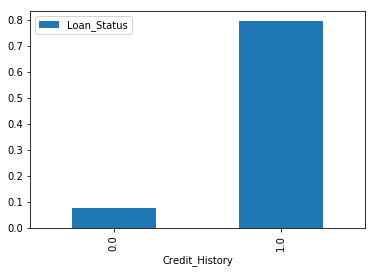

In [16]:
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

This shows that the chances of getting a loan are eight-fold if the applicant has a valid credit history.

##### We can stack both of this charts in a single graph for getting a better comparision

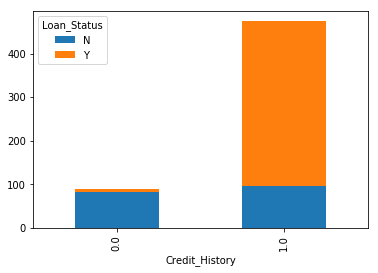

In [17]:
pd.crosstab(index=data["Credit_History"], columns=data["Loan_Status"]).plot(kind="bar",stacked=True)

##### We now visiualize loan on gender basis 

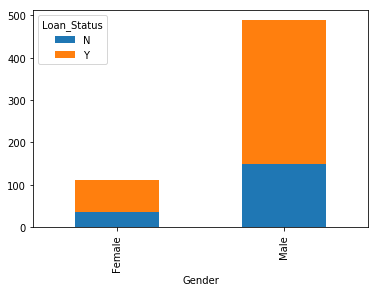

In [18]:
pd.crosstab(data.Gender,data.Loan_Status).plot(kind='bar',stacked=True)

In [19]:
pd.crosstab(data.Gender,data.Loan_Status,normalize='index')

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


In [20]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

##### We will now analyize loan data by maritial status

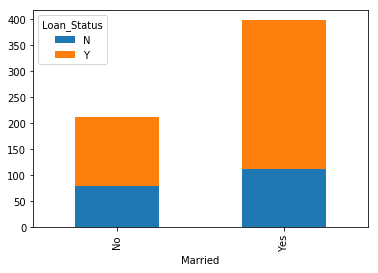

In [21]:
pd.crosstab(data.Married,data.Loan_Status).plot(kind='bar',stacked=True)

In [22]:
pd.crosstab(data.Married,data.Loan_Status,normalize='index')

Loan_Status,N,Y
Married,,
No,0.370892,0.629108
Yes,0.283920,0.716080


 50 % of customer are Married , also to be married ,you have 10 % more chance to take loan. significant 

#### Analysis on the basis of area

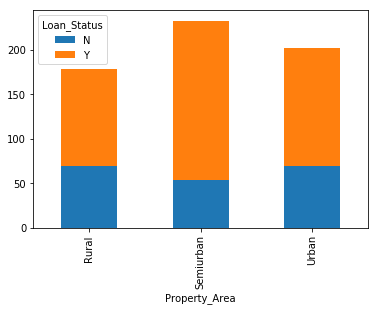

In [23]:
pd.crosstab(data.Property_Area,data.Loan_Status).plot(kind='bar',stacked=True)

In [24]:
pd.crosstab(data.Loan_Status,data.Property_Area,normalize='columns')

Property_Area,Rural,Semiurban,Urban
Loan_Status,,,
N,0.385475,0.23176,0.341584
Y,0.614525,0.76824,0.658416


### Data Muning

In [25]:
#checking missing values in the dataset
data.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

###### Filling the empty cells of loan amount with mean values 

In [26]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

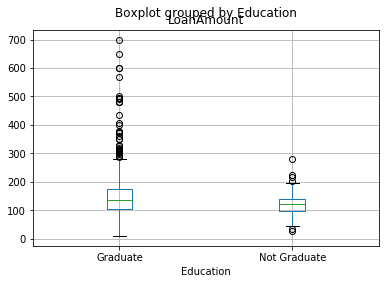

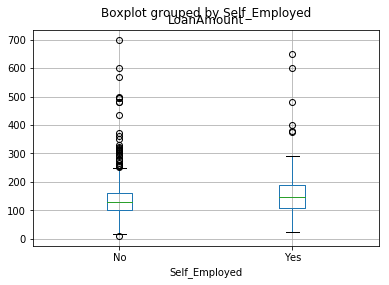

In [27]:
data.boxplot(column='LoanAmount',by='Education')
data.boxplot(column='LoanAmount',by='Self_Employed')



In [28]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [29]:
data['Self_Employed'].fillna('No',inplace=True)

The extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let’s try a log transformation to nullify their effect:

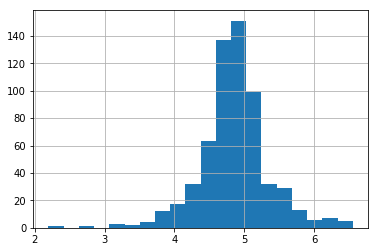

In [30]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])
data['LoanAmount_log'].hist(bins=20)

##### some applicants have lower income but strong support Co-applicants. So we will combine both incomes as total income and take a log transformation of the same.

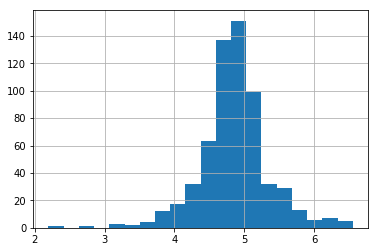

In [31]:
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['TotalIncome_log'] = np.log(data['TotalIncome'])
data['LoanAmount_log'].hist(bins=20) 

In [32]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

# Now we will train the model for predictions

The python code to create a predictive model on our data set we will use <b>Skicit-Learn (sklearn)</b> as it is  the most commonly used library in Python for this purpose.sklearn requires all inputs to be numeric, we will convert all our categorical variables into numeric by encoding the categories

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

le = LabelEncoder()

for i in var_mod:
    data[i] = le.fit_transform(data[i])

data.dtypes 

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [35]:
#importing models from scikit learn module
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
import sklearn.tree as st
from sklearn import metrics

In [36]:
#Generic function for making a classification model and accessing performance:
def classification_model(model, df, predictors, outcome):
  #Fit the model:
  model.fit(df[predictors],df[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(df[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,df[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
  
  #Perform k-fold cross-validation with 5 folds
  kf=KFold(n_splits=5, shuffle=False, random_state=None)  
  kf.get_n_splits(df)
  

  error = []
  for train, test in kf.split(df):
    # Filter training data
    train_predictors = (df[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = df[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(df[predictors].iloc[test,:], df[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(df[predictors],df[outcome]) 

### LogisticRegression Model

In [37]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var =  ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model,data,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


C:\Users\Vishwam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vishwam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vishwam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vishwam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vishwam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

### Desicion Tree 

In [38]:
model = st.DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model,data,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [39]:
#Different combination of variables 
model = st.DecisionTreeClassifier()
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model,data,predictor_var,outcome_var)

Accuracy : 89.414%
Cross-Validation Score : 68.397%


### Random Forest 

In [40]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model,data,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 78.506%


we see that the accuracy is 100% for the training set. This is the ultimate case of overfitting and can be resolved in two ways:

    * Reducing the number of predictors
    * Tuning the model parameters


In [41]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Credit_History      0.269010
TotalIncome_log     0.264516
LoanAmount_log      0.234232
Dependents          0.050281
Property_Area       0.047280
Loan_Amount_Term    0.041360
Married             0.026347
Education           0.023678
Gender              0.022512
Self_Employed       0.020784
dtype: float64


In [42]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model,data,predictor_var,outcome_var)

Accuracy : 82.573%
Cross-Validation Score : 80.296%
